In [3]:
# Importing needed libraries 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import zscore

import os
import xarray as xr



from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache



In [4]:
#%matplotlib inline
%matplotlib widget

In [5]:
# Download data. Example cache directory path, it determines where downloaded data will be stored
data_directory = 'cache'

manifest_path = os.path.join(data_directory, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')

In [6]:
# Importing sessions
sessions = cache.get_session_table()
sessions.full_genotype.value_counts()

wt/wt                                              30
Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt      12
Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt     8
Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt       8
Name: full_genotype, dtype: int64

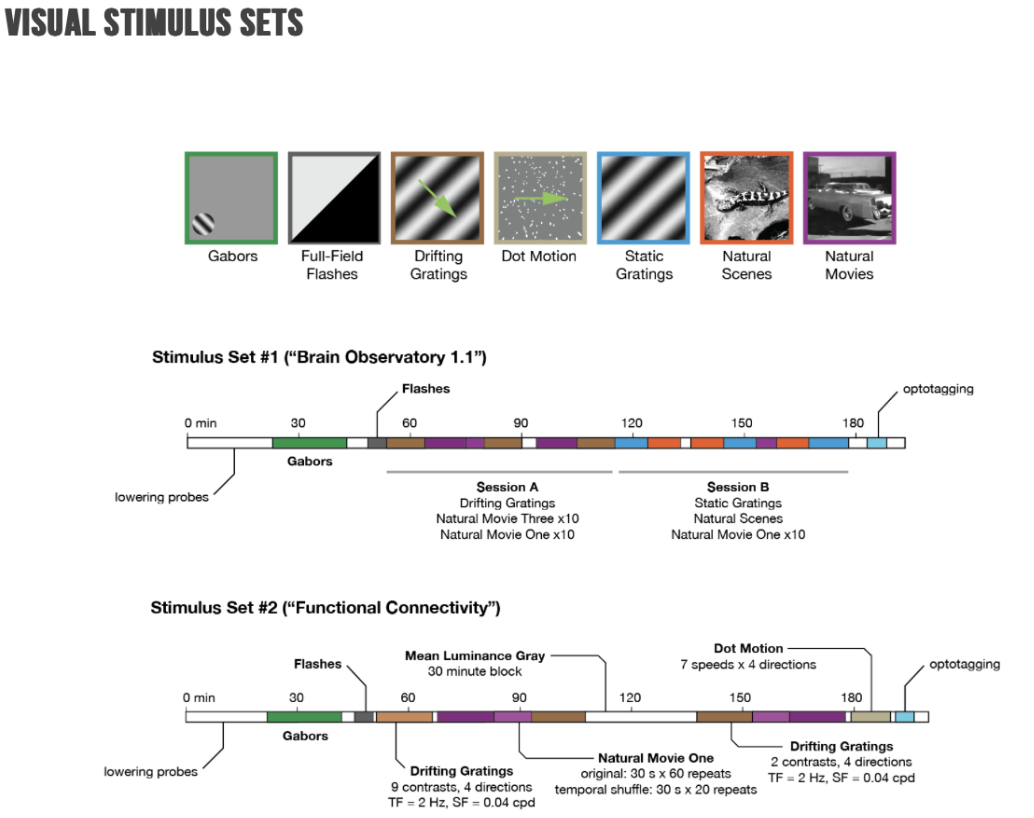

### Computations for session_type = brain_observatory_1.1

In [7]:
# Obtain the different sessions
pvalb_ses = sessions[np.logical_and(sessions.full_genotype.str.match('Pvalb').values,
                    sessions.session_type.str.match('brain_observatory_1.1').values)]
vip_ses = sessions[np.logical_and(sessions.full_genotype.str.match('Vip').values,
                    sessions.session_type.str.match('brain_observatory_1.1').values)]
sst_ses = sessions[np.logical_and(sessions.full_genotype.str.match('Sst').values,
                    sessions.session_type.str.match('brain_observatory_1.1').values)]
wild_ses = sessions[np.logical_and(sessions.full_genotype.str.match('wt').values,
                    sessions.session_type.str.match('brain_observatory_1.1').values)]

### Computations for session_type = functional_connectivity

In [8]:
# Obtain the different sessions
pvalb_ses = sessions[np.logical_and(sessions.full_genotype.str.match('Pvalb').values,
                    sessions.session_type.str.match('functional_connectivity').values)]
vip_ses = sessions[np.logical_and(sessions.full_genotype.str.match('Vip').values,
                    sessions.session_type.str.match('functional_connectivity').values)]
sst_ses = sessions[np.logical_and(sessions.full_genotype.str.match('Sst').values,
                    sessions.session_type.str.match('functional_connectivity').values)]
wild_ses = sessions[np.logical_and(sessions.full_genotype.str.match('wt').values,
                    sessions.session_type.str.match('functional_connectivity').values)]

In [9]:
# We want the session 2nd last from wild
session_id = wild_ses.index.values[-2]
session = cache.get_session_data(session_id)
# V1 and CA1 units 
V1_units = session.units[session.units.ecephys_structure_acronym == 'VISp']
CA1_units = session.units[session.units.ecephys_structure_acronym == 'CA1']

/gs/home/gascogalvezc/miniconda3/envs/allensdk/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/gs/home/gascogalvezc/miniconda3/envs/allensdk/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/gs/home/gascogalvezc/miniconda3/envs/allensdk/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/gs/home/gascogalvezc/miniconda3/envs/allensdk/lib/python3.11/site-packages/hdmf/spec/namespace.py

In [10]:
session.get_stimulus_epochs()

/gs/home/gascogalvezc/miniconda3/envs/allensdk/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/gs/home/gascogalvezc/miniconda3/envs/allensdk/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


start_time    stop_time     duration                   stimulus_name  \
0     11.271364    71.338174    60.066810                     spontaneous   
1     71.338174   983.333706   911.995532                          gabors   
2    983.333706  1272.325304   288.991598                     spontaneous   
3   1272.325304  1570.824827   298.499523                         flashes   
4   1570.824827  1632.626454    61.801627                     spontaneous   
5   1632.626454  2172.577850   539.951396      drifting_gratings_contrast   
6   2172.577850  2293.178644   120.600794                     spontaneous   
7   2293.178644  3193.931604   900.752960  natural_movie_one_more_repeats   
8   3193.931604  3494.182624   300.251020      natural_movie_one_shuffled   
9   3494.182624  4393.934716   899.752092    drifting_gratings_75_repeats   
10  4393.934716  6196.441964  1802.507248                     spontaneous   
11  6196.441964  7096.194686   899.752722    drifting_gratings_75_repeats   
12  7096.194686  7097.195514     1.000828                     spontaneous   
13  7097.195514  7397.446624   300.251110      natural_movie_one_shuffled   
14  7397.446624  8298.199744   900.753120  natural_movie_one_more_repeats   
15  8298.199744  9137.901726   839.701982                      dot_motion   

   stimulus_block  
0            null  
1             0.0  
2            null  
3             1.0  
4            null  
5             2.0  
6            null  
7             3.0  
8             4.0  
9             5.0  
10           null  
11            6.0  
12           null  
13            7.0  
14            8.0  
15            9.0

In [11]:
print('Probes_id with CA1_units:', CA1_units.probe_id.unique())

Probes_id with CA1_units: [822645895 822645899 822645901]


In [12]:
# Units in the last probe (822645901) 
probe_id = CA1_units.probe_id.unique()[-1]
probe_CA1_units = CA1_units[CA1_units.probe_id==probe_id]
probe_units = session.units[(session.units.probe_id == probe_id)]
probe_channels = session.channels[(session.channels.probe_id.values == probe_id)]

print(f'There are {len(probe_CA1_units)} CA1 units out of {len(probe_units)} in probe_id {probe_id}.')
print(f'The probe has {len(probe_channels)} channels.')

There are 21 CA1 units out of 62 in probe_id 822645901.
The probe has 371 channels.


In [13]:
{session.probes.loc[probe_id].description : 
     list(session.channels[session.channels.probe_id == probe_id].ecephys_structure_acronym.unique())
     for probe_id in session.probes.index.values}

{'probeA': ['VISam', nan, 'grey'],
 'probeB': [nan, 'LP', 'DG', 'CA1', 'VISpm'],
 'probeC': ['VISp', 'grey', nan],
 'probeD': ['VISl', nan, 'LGv', 'TH', 'DG', 'CA3', 'CA1', 'ProS'],
 'probeE': ['VISal', nan, 'LGd', 'CA3', 'DG', 'CA1']}

In [14]:
probe_id = session.probes[session.probes.description == 'probeE'].index.values[0]


In [15]:
probe_id

822645901

In [16]:
# Extract LFP from that probe_id
lfp = session.get_lfp(probe_id) # raw
lfp_aux = lfp

In [33]:
aux = []
j = 0
t=0
for i in range(len(probe_units.peak_channel_id.values)):

    if np.isin(lfp.channel.values[i], probe_units.peak_channel_id.values):
        aux.append(j)
        t+=1
    else: 
        aux.append(0)
    j += 1  
        

In [34]:
channels_and_depths = np.vstack((probe_units.probe_channel_number.values, session.units[session.units.probe_id == probe_id].ecephys_structure_acronym, probe_units.probe_vertical_position.values, probe_units.probe_horizontal_position.values,aux)).T
print('Chn  Acro  Ver Hor LFP_chn')
print(channels_and_depths)

Chn  Acro  Ver Hor LFP_chn
[[38 'CA3' 400 59 0]
 [45 'CA3' 460 11 0]
 [46 'CA3' 480 59 0]
 [50 'CA3' 520 59 0]
 [52 'CA3' 540 43 0]
 [52 'CA3' 540 43 0]
 [55 'CA3' 560 27 0]
 [54 'CA3' 560 59 0]
 [57 'CA3' 580 11 0]
 [57 'CA3' 580 11 9]
 [57 'CA3' 580 11 0]
 [56 'CA3' 580 43 11]
 [59 'CA3' 600 27 12]
 [78 'DG' 800 59 13]
 [81 'DG' 820 11 0]
 [126 'CA1' 1280 59 0]
 [145 'CA1' 1460 11 0]
 [146 'CA1' 1480 59 0]
 [149 'CA1' 1500 11 0]
 [150 'CA1' 1520 59 19]
 [150 'CA1' 1520 59 0]
 [150 'CA1' 1520 59 0]
 [150 'CA1' 1520 59 0]
 [150 'CA1' 1520 59 0]
 [150 'CA1' 1520 59 0]
 [150 'CA1' 1520 59 0]
 [153 'CA1' 1540 11 0]
 [153 'CA1' 1540 11 0]
 [153 'CA1' 1540 11 0]
 [152 'CA1' 1540 43 0]
 [152 'CA1' 1540 43 0]
 [152 'CA1' 1540 43 31]
 [155 'CA1' 1560 27 0]
 [155 'CA1' 1560 27 0]
 [155 'CA1' 1560 27 0]
 [164 'CA1' 1660 43 0]
 [183 'VISal' 1840 27 36]
 [183 'VISal' 1840 27 37]
 [182 'VISal' 1840 59 0]
 [185 'VISal' 1860 11 0]
 [185 'VISal' 1860 11 0]
 [184 'VISal' 1860 43 0]
 [187 'VISal' 1880 2

['LGd' 'CA3' 'DG' 'CA1' 'VISal' nan]
[ 0  9 18 24 44 65 75]


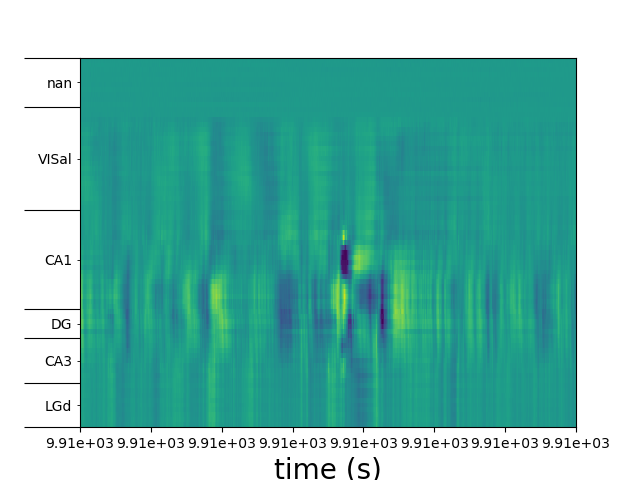

In [35]:
PRINT_LFP_ACRONYMS = True
if PRINT_LFP_ACRONYMS:
    # now use a utility to associate intervals of /rows with structures
    structure_acronyms, intervals = session.channel_structure_intervals(lfp["channel"])
    interval_midpoints = [aa + (bb - aa) / 2 for aa, bb in zip(intervals[:-1], intervals[1:])]

print(structure_acronyms)
print(intervals)
if PRINT_LFP_ACRONYMS:
    window = np.where(np.logical_and(lfp["time"] < 9909, lfp["time"] >= 9907))[0]

    fig, ax = plt.subplots()
    ax.pcolormesh(lfp[{"time": window}].T)

    ax.set_yticks(intervals)
    ax.set_yticks(interval_midpoints, minor=True)
    ax.set_yticklabels(structure_acronyms, minor=True)
    plt.tick_params("y", which="major", labelleft=False, length=40)

    num_time_labels = 8
    time_label_indices = np.around(np.linspace(1, len(window), num_time_labels)).astype(int) - 1
    time_labels = [ f"{val:1.3}" for val in lfp["time"].values[window][time_label_indices]]
    ax.set_xticks(time_label_indices + 0.5)
    ax.set_xticklabels(time_labels)
    ax.set_xlabel("time (s)", fontsize=20)

    plt.show()


In [36]:
# Obtaining units of interest
VIS_units_of_interest = session.units[(session.units.probe_id == probe_id) &
                                  (session.units.ecephys_structure_acronym.str.find('VIS') > -1) &
                                  (session.units.firing_rate > 1) & 
                                  (session.units.nn_hit_rate > 0.95) & 
                                  (session.units.probe_vertical_position>2500)]
CA1_units_of_interest = session.units[(session.units.probe_id == probe_id) &
                            (session.units.ecephys_structure_acronym.str.find('CA1') > -1) &
                            (session.units.probe_vertical_position<2500)]

#### Unit Quality Metrics that can be used 
**• Firing rate (firing_rate):** filter out units that have too few spikes to result in meaningful analysis. 

**• Presence ratio (presence_ratio):** it measures the fraction of time during a session in which a unit is spiking, and ranges from 0 to 0.99. Units with lower presence ratio are likely to have drifted out of the recording, or had waveforms that changed so dramatically they were assigned to separate clusters.

**• Amplitude cutoff (amplitude_cutoff):** estimate of the false negative rate—e.g., the fraction of spikes below the spike detection threshold. Thus, amplitude cutoff is a measure of unit "completeness" that is complementary to presence ratio (0.1 = 10% of spikes missing from that unit).

**• ISI violations (isi_Violations):** measure of unit contamination (higher number higher contamination). Because of the biophysical refractory period, we can assume that any spikes occurring in rapid succession (<1.5 ms intervals) come from two different neurons.

**• SNR (snr):** Not recommended for Neuropixels. Ratio of the maximum amplitude of the mean spike waveform to the standard deviation of the background noise on one channel.

**• Isolation distance (isolation distance):**  based on the principal components (PCs) of a unit's waveforms. The higher the isolation distance, the more a unit is separated from its neighbors in PC space, and therefore the lower the likelihood that it's contamined by spikes from multiple units. Correlated with overall cluster quality.

**• d-prime (d_prime):** metric calculated for the waveform PCs. It uses linear discriminant analysis to calculate the separability of one unit's PC cluster and all of the others. A higher d-prime value indicates that the unit is better isolated from its neighbors.

**• Nearest-neighbors-hit-rate (nn_hit_rate):** looks at the PCs for one unit and calculates the fraction of their nearest neighbors that fall within the same cluster. If a unit is highly contaminated, then many of the closest spikes will come from other units. Always falls between 0 and 1.

https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_neuropixels_quality_metrics.html

In [20]:
# Closest LFP with CA1 channel peak  
CA1_channels = (CA1_units_of_interest.peak_channel_id).unique()
CA1_channels_close_to_LFP = np.unique(lfp.channel.values[np.searchsorted(lfp.channel.values, CA1_channels)])
lfp_indices_CA1 = np.where(np.isin(lfp.channel.values, np.unique(CA1_channels_close_to_LFP)))

In [21]:
# Dimensions
print(len(channels_and_depths))
print(len(lfp.channel.values))
print(len(CA1_channels_close_to_LFP))

62
75
6


In [22]:
print(CA1_channels_close_to_LFP)
print(lfp_indices_CA1)
# CA1 24-44 channels

[849795074 849795114 849795122 849795130 849795138 849795154]
(array([31, 36, 37, 38, 39, 41]),)


In [23]:
# Saving in files
save = False
if save: 
    print('Saving data..')
    docs_dir=os.path.expanduser('/cs/departmentN4/4Carmen/LFP_extracted')
    np.save(os.path.join(docs_dir, 'raw_lfp_fc'),lfp)
    np.save(os.path.join(docs_dir, 'lfp_indeces_CA1'),lfp_indices_CA1)
    np.save(os.path.join(docs_dir, 'channels_and_depths'),channels_and_depths)
    print('Done!')

## Plots

In [24]:
print(f'There are {len(session.probes)} probes in this session. {len(CA1_units.probe_id.unique())} have CA1 units.')

There are 5 probes in this session. 3 have CA1 units.


In [42]:
np.int32(np.linspace(21,41,21))

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41], dtype=int32)

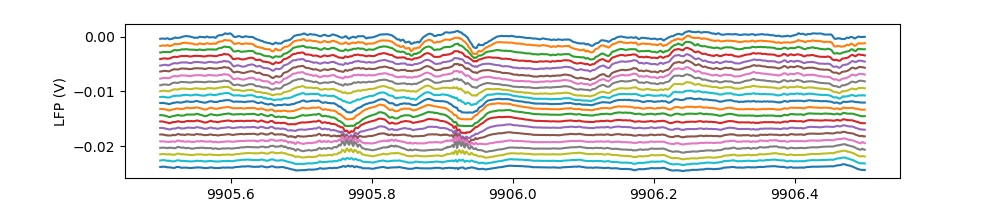

In [43]:
# With ripple
lfp_slice = lfp.sel(time=slice(9905.5,9906.5)) 
#indeces = np.array([41, 40, 39, 38, 37, 36, 35, 31])
indeces = np.int32(np.linspace(21,41,21))

plt.figure(figsize=(10,2))
j = 0
for i in indeces:
    _ = plt.plot(lfp_slice.time, lfp_slice.sel(channel=lfp_slice.channel[i]) - j)
    j += 0.0012
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')
plt.show()


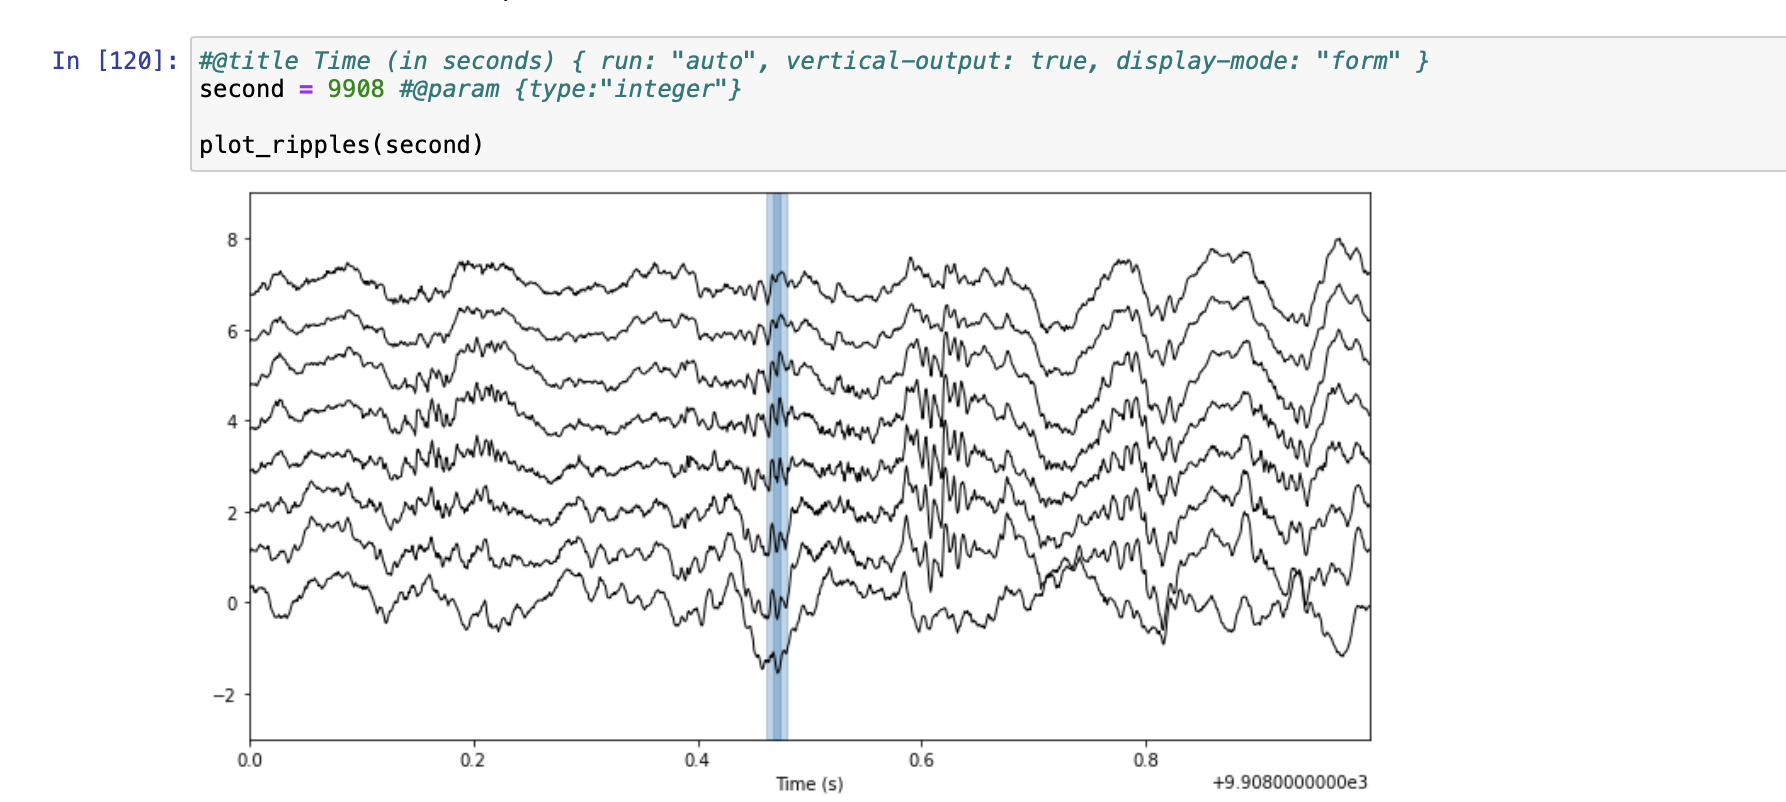

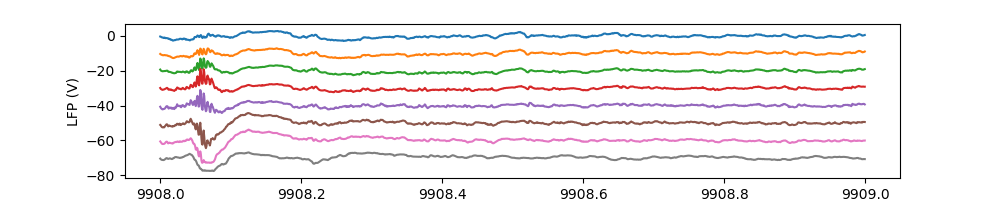

In [26]:
# Normalized
lfp_slice = (lfp.sel(time=slice(9908,9909)))
indeces = np.array([41, 40, 39, 38, 37, 36, 35, 31])

plt.figure(figsize=(10,2))
j = 0
for i in indeces:
    _ = plt.plot(lfp_slice.time, ((lfp_slice.sel(channel=lfp_slice.channel[i]) - np.mean(lfp.sel(channel=lfp_slice.channel[i])))/ np.std(lfp.sel(channel=lfp_slice.channel[i])) - j))
    j += 10
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')
plt.show()

### Probe trajectories in the brain using CCF coordinates (Allen Common Coordinate Framework ) 
(the darker the deeper)

In [27]:
len(session.probes)

5

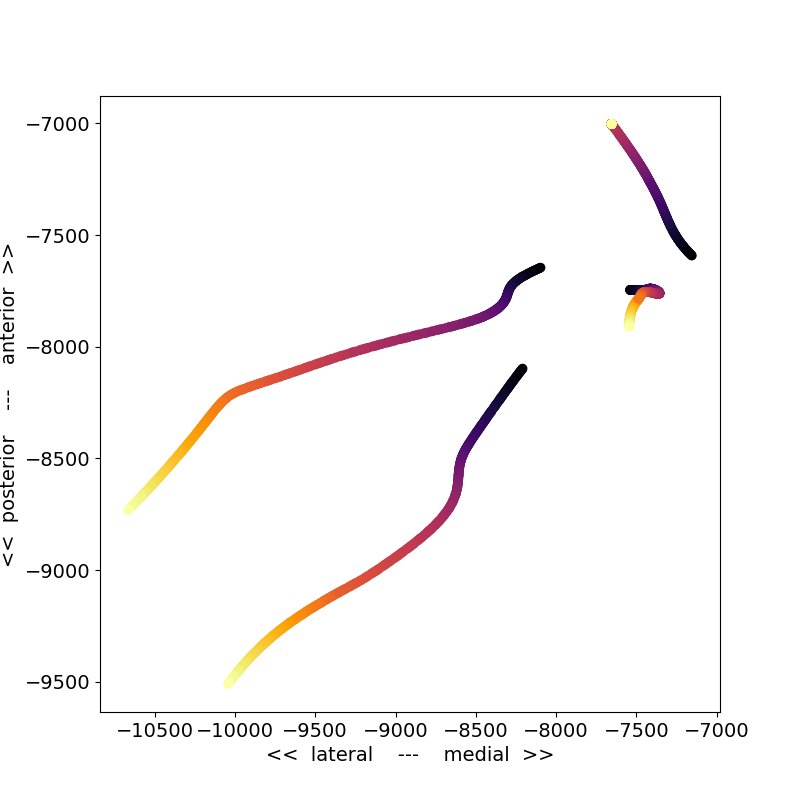

In [28]:
plt.rcParams.update({'font.size': 14})

x_coords = session.channels.left_right_ccf_coordinate
y_coords = session.channels.anterior_posterior_ccf_coordinate
color = session.channels.probe_vertical_position

plt.figure(figsize=(8,8))
_ = plt.scatter(-x_coords[x_coords > 0], -y_coords[x_coords > 0], c=color[x_coords > 0], cmap='inferno')
_ = plt.xlabel('<<  lateral    ---    medial  >>')
_ = plt.ylabel('<<  posterior    ---    anterior  >>')

### Visualization using Imshow method 

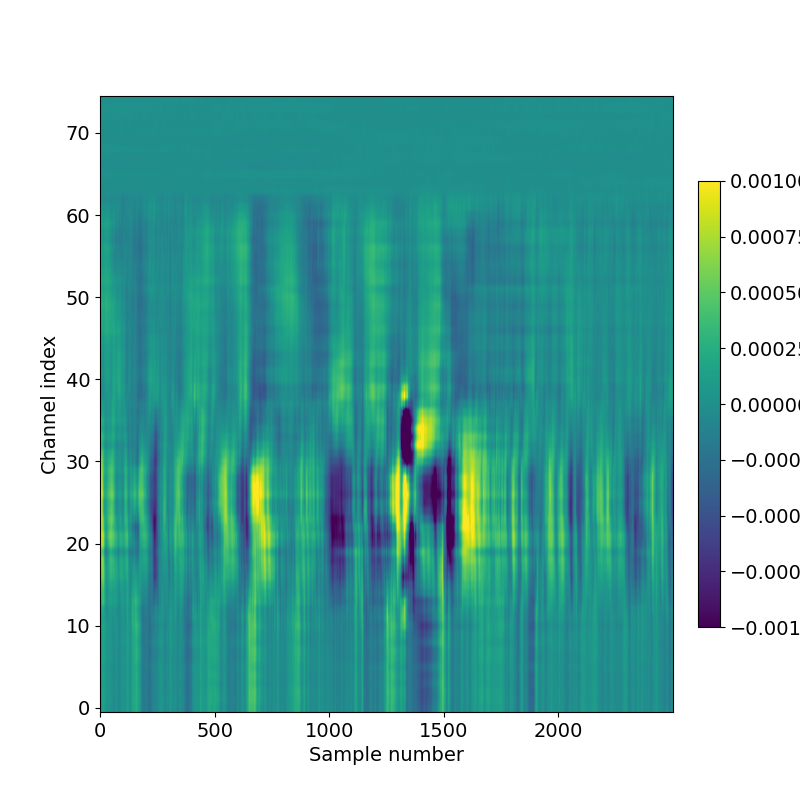

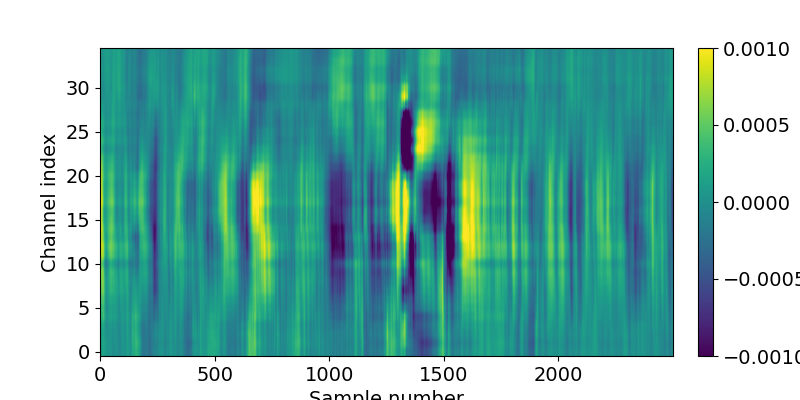

In [29]:
# Time with ripple
lfp_slice = lfp.sel(time=slice(9907,9909)) 

plt.figure(figsize=(8,8))
im = plt.imshow(lfp_slice.T,aspect='auto',origin='lower',vmin=-1e-3, vmax=1e-3)
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Sample number')
_ = plt.ylabel('Channel index')

plt.show()
channel_ids = session.channels[(session.channels.probe_id == probe_id) & \
                 (session.channels.ecephys_structure_acronym.isin(['CA1','CA3','DG']))].index.values

lfp_slice2 = lfp_slice.sel(channel=slice(np.min(channel_ids), np.max(channel_ids)))

plt.figure(figsize=(8,4))
im = plt.imshow(lfp_slice2.T,aspect='auto',origin='lower',vmin=-1e-3, vmax=1e-3)
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Sample number')
_ = plt.ylabel('Channel index')

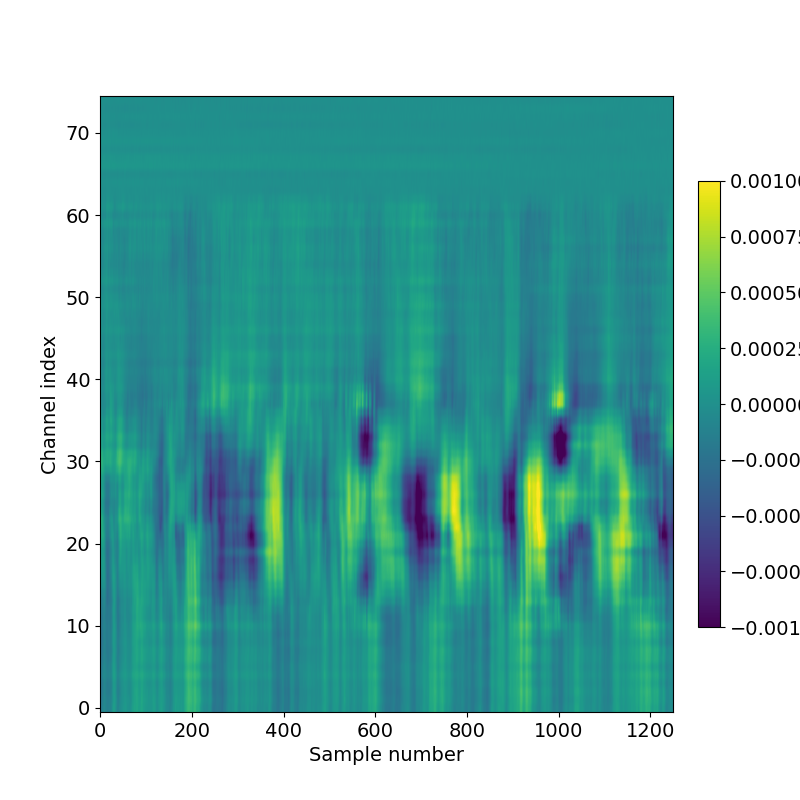

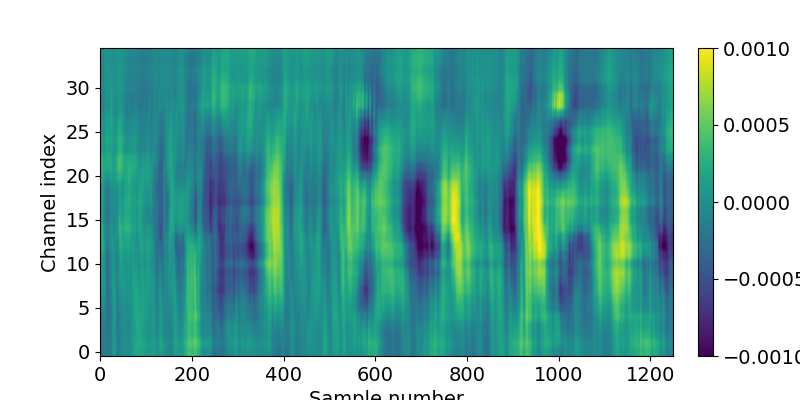

In [30]:
# Time without ripple
lfp_slice = lfp.sel(time=slice(5000,5001)) 

plt.figure(figsize=(8,8))
im = plt.imshow(lfp_slice.T,aspect='auto',origin='lower',vmin=-1e-3, vmax=1e-3)
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Sample number')
_ = plt.ylabel('Channel index')

plt.show()
channel_ids = session.channels[(session.channels.probe_id == probe_id) & \
                 (session.channels.ecephys_structure_acronym.isin(['CA1','CA3','DG']))].index.values

lfp_slice2 = lfp_slice.sel(channel=slice(np.min(channel_ids), np.max(channel_ids)))

plt.figure(figsize=(8,4))
im = plt.imshow(lfp_slice2.T,aspect='auto',origin='lower',vmin=-1e-3, vmax=1e-3)
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Sample number')
_ = plt.ylabel('Channel index')

### CSD

In [31]:
# Pre-computed CSD in response to a flash stimulus for all probes with LFP

csd = session.get_current_source_density(probe_id) 

In [32]:
csd["time"]

<xarray.DataArray 'time' (time: 3250)>
array([-0.3   , -0.2996, -0.2992, ...,  0.9988,  0.9992,  0.9996])
Coordinates:
  * time     (time) float64 -0.3 -0.2996 -0.2992 ... 0.9988 0.9992 0.9996

/tmp/ipykernel_1465617/2536561417.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


[]

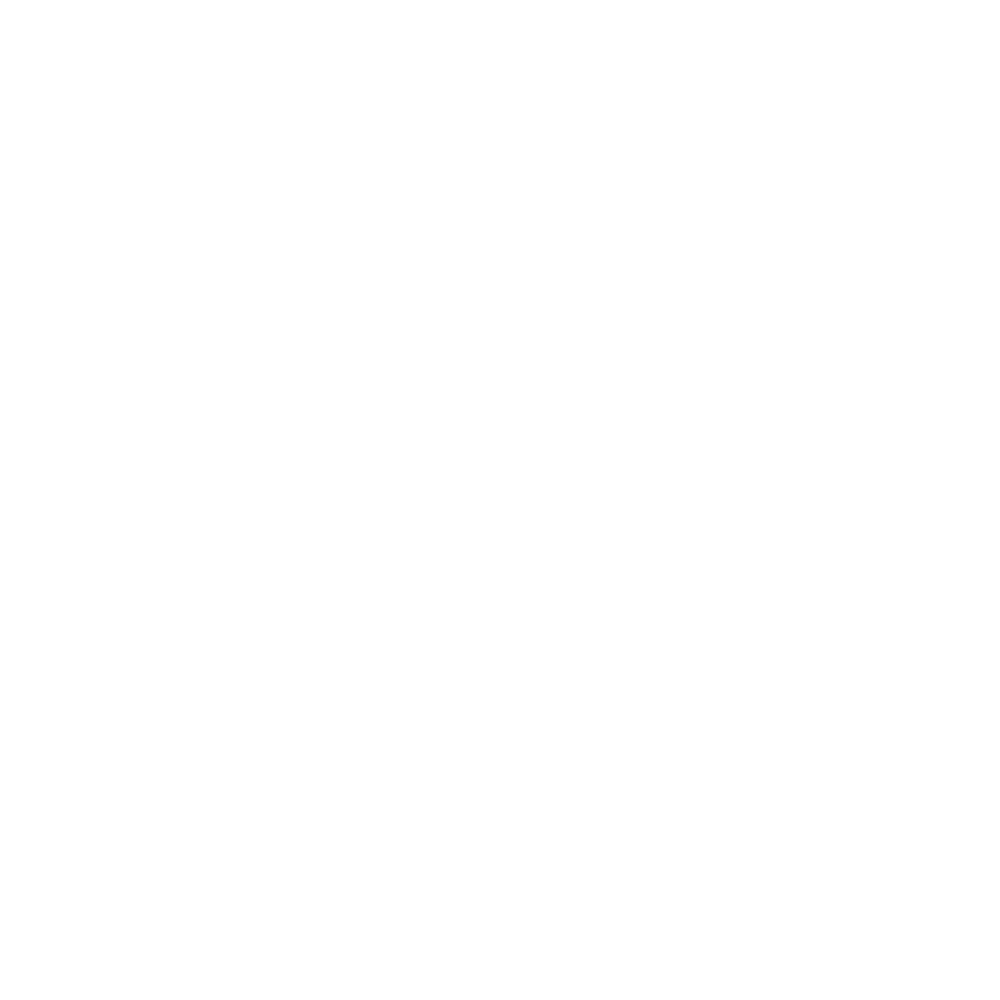

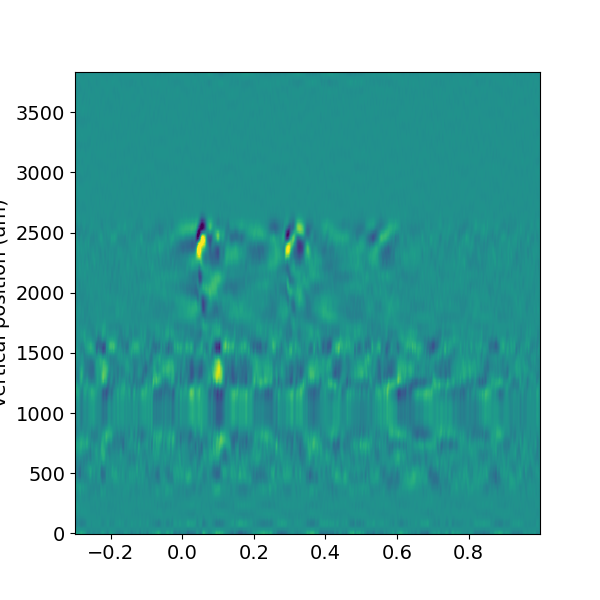

In [33]:
from scipy.ndimage.filters import gaussian_filter

_ = plt.figure(figsize=(10,10))

filtered_csd = gaussian_filter(csd.data, sigma=(5,1))

fig, ax = plt.subplots(figsize=(6, 6))

_ = ax.pcolor(csd["time"], csd["vertical_position"], filtered_csd, vmin=-3e4, vmax=3e4)

#_ = ax.set_xlabel("time relative to stimulus onset (s)")
_ = ax.set_ylabel("vertical position (um)")


#chans_in_v1 = chans[(chans['probe_id']==1064735073)&(chans['structure_acronym'].str.contains('VISp'))]
#last_cortex_channel_position = chans_in_v1['probe_vertical_position'].min()

#ax.axhline(first_channel_in_brain_position, c='w')
#ax.text(-0.075, first_channel_in_brain_position+50, 'brain surface', c='w')
#ax.axhline(last_cortex_channel_position, c='w')
#ax.text(-0.075, last_cortex_channel_position+50, 'end of cortex', c='w')
plt.plot()

In [34]:
list(session.channels[(session.channels.probe_id == probe_id) &
                 (session.channels.probe_vertical_position > 2000) &
                 (session.channels.probe_vertical_position < 2600)].ecephys_structure_acronym.unique())

['VISal']

In [35]:
list(session.channels[(session.channels.probe_id == probe_id) &
                 (session.channels.probe_vertical_position > 1100) &
                 (session.channels.probe_vertical_position < 1700)].ecephys_structure_acronym.unique())

['CA1']

### Trying to extract the Mean_Luminance_Gray part but it is not part of the stimulus 

In [36]:
stim_presentations = session.stimulus_presentations
flashes = stim_presentations[stim_presentations['stimulus_name'].str.contains('flash')]
presentation_times = flashes.start_time.values
#presentation_ids = flashes.index.values
presentation_times

array([1272.32530426, 1274.32698426, 1276.32866426, 1278.33030426,
       1280.33198426, 1282.33362426, 1284.33535426, 1286.33697426,
       1288.33866426, 1290.34032426, 1292.34201426, 1294.34366426,
       1296.34536426, 1298.34702426, 1300.34870426, 1302.35037426,
       1304.35207426, 1306.35370426, 1308.35540426, 1310.35707426,
       1312.35874426, 1314.36045426, 1316.36208426, 1318.36376426,
       1320.36547426, 1322.36713426, 1324.36881426, 1326.37045426,
       1328.37214426, 1330.37377426, 1332.37550426, 1334.37714426,
       1336.37881426, 1338.38053426, 1340.38216426, 1342.38382426,
       1344.38554426, 1346.38715426, 1348.38890426, 1350.39055426,
       1352.39222426, 1354.39388426, 1356.39555426, 1358.39720426,
       1360.39890426, 1362.40061426, 1364.40223426, 1366.40393426,
       1368.40558426, 1370.40725426, 1372.40893426, 1374.41061426,
       1376.41229426, 1378.41398426, 1380.41563426, 1382.41728426,
       1384.41897426, 1386.42067426, 1388.42233426, 1390.42398

In [37]:
stim_presentations.keys()

Index(['stimulus_block', 'start_time', 'stop_time', 'Speed', 'size', 'phase',
       'stimulus_name', 'y_position', 'x_position', 'Dir', 'frame', 'color',
       'coherence', 'spatial_frequency', 'temporal_frequency', 'contrast',
       'orientation', 'duration', 'stimulus_condition_id'],
      dtype='object')

In [38]:
stim_presentations.stimulus_name.unique()


array(['spontaneous', 'gabors', 'flashes', 'drifting_gratings_contrast',
       'natural_movie_one_more_repeats', 'natural_movie_one_shuffled',
       'drifting_gratings_75_repeats', 'dot_motion'], dtype=object)

### LFP for averaged ripple times

In [39]:
lfp = lfp_aux # Otherwise we will have problems with previous slicings

In [40]:
loaded_ripple_pred = np.load('/cs/projects/OWVinckSWR/Carmen/LFP_extracted/ripple_pred_times.npy')
print(f'Shape of the loaded time predicted ripples is {np.shape(loaded_ripple_pred)}') 

Shape of the loaded time predicted ripples is (11992, 2)


In [41]:
loaded_ripple_pred = np.load('/cs/projects/OWVinckSWR/Carmen/LFP_extracted/ripple_pred_times_CNN2D.npy')
print(f'Shape of the loaded time predicted ripples is {np.shape(loaded_ripple_pred)}')  
print('With these predictions, the average ripple duration is higher!!')

Shape of the loaded time predicted ripples is (1707, 2)
With these predictions, the average ripple duration is higher!!


In [42]:
# Average ripple duration computation
avg_ripple_duration = np.mean(loaded_ripple_pred[:][0][1]-loaded_ripple_pred[:][0][0])
print(f'The average ripple duration is {round(avg_ripple_duration,3)} s')

The average ripple duration is 0.032 s


print(lfp_values_plot)
print(lfp_values_plot.shape)

print(lfp_ripple.shape)
print(lfp_ripple[0][0][0])
print(lfp_ripple[0][0][1])
print(lfp_values_plot[0][0])
(lfp_ripple[0][0][1] + lfp_ripple[0][0][0])/2
loaded_ripple_pred.shape

In [43]:
# LFP values during ripples, 1000 ripples, with CNN2D
aux = []
time_outside_ripple = 0.05
fz = 1250
for i in np.arange(500,1500):
    start = (loaded_ripple_pred[i][0]-time_outside_ripple)
    end = (loaded_ripple_pred[i][1]+time_outside_ripple)
    aux2 = lfp[np.logical_and(lfp["time"] > start, lfp["time"] < end)]
    if (np.shape(aux2)[0] == 165):
        aux.append(aux2)
lfp_ripple = np.stack(aux, axis = -1)

# Computing the average
lfp_values_plot = np.mean(lfp_ripple, axis = -1)

['LGd' 'CA3' 'DG' 'CA1' 'VISal' nan]
[ 0  9 18 24 44 65 75]


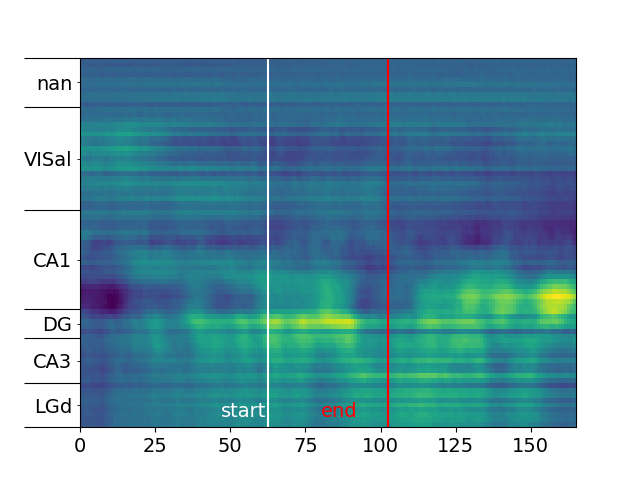

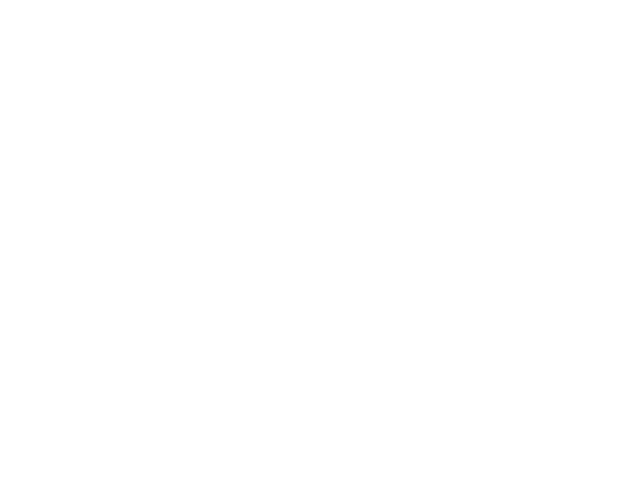

In [44]:
PRINT_LFP_ACRONYMS = True
plt.figure()
if PRINT_LFP_ACRONYMS:
    # now use a utility to associate intervals of /rows with structures
    structure_acronyms, intervals = session.channel_structure_intervals(lfp["channel"])
    interval_midpoints = [aa + (bb - aa) / 2 for aa, bb in zip(intervals[:-1], intervals[1:])]

print(structure_acronyms)
print(intervals)
if PRINT_LFP_ACRONYMS:

    window = np.arange(0,len(lfp_values_plot)-1)
    fig, ax = plt.subplots()
    ax.pcolormesh(lfp_values_plot.T)

    ax.set_yticks(intervals)
    ax.set_yticks(interval_midpoints, minor=True)
    ax.set_yticklabels(structure_acronyms, minor=True)
    plt.tick_params("y", which="major", labelleft=False, length=40)

    #num_time_labels = 8
    #time_label_indices = (np.around(np.linspace(1, len(window), num_time_labels)).astype(int) - 1)/1250
    #time_labels = [ f"{val:1.3}" for val in lfp_values_plot["time"].values[window][time_label_indices]]
    #ax.set_xticks(time_label_indices + 0.5)
    #ax.set_xticklabels(time_labels)
    ax.axvline(time_outside_ripple*fz, c='w')
    ax.text(47 ,2 ,'start', c='w')
    ax.axvline(time_outside_ripple*fz + avg_ripple_duration*fz, c='r')
    ax.text(80,2 ,'end', c='r')
    #ax.set_xlabel("time (s)", fontsize=20)

    plt.show()

# Checking ripple band power 

In [17]:
from scipy.signal import butter
from scipy.signal import sosfiltfilt
import pywt
from pywt import scale2frequency
from pywt import cwt

def bandpass_filter(signal, low_f, high_f, sampling_rate=1250, filter_order=5):
    '''
    Band pass filter based on the scipy implementation of butterwirth filtering.

    Returns the filtered signal in the specified frequency band.

    Parameters
    ----------
    signal : array-like
        the signal to filter

    low_f : float
        lower bound of the frequency band

    high_f : float
        higher bound of the frequency band

    sampling_rate : float
        sampling rate of the signal, defaults to 1 if not specified

    filter_order : int
        order of the butterwirth filter, defaults to 15 if not specified

    Returns
    -------
    filtered_signal : array-like
        filtered signal

    '''
    filter = butter(filter_order, [low_f, high_f],
                    btype='bandpass', output='sos', fs=sampling_rate)
    filtered_signal = sosfiltfilt(filter, signal)
    return filtered_signal

Filtered different from non-filtered, scale to 10 seconds I cannot see nothing

In [18]:
# sosfilt phase shift 
# eco self 1 pass conv forward and back correct shift

In [19]:
lfp.shape

(12419461, 75)

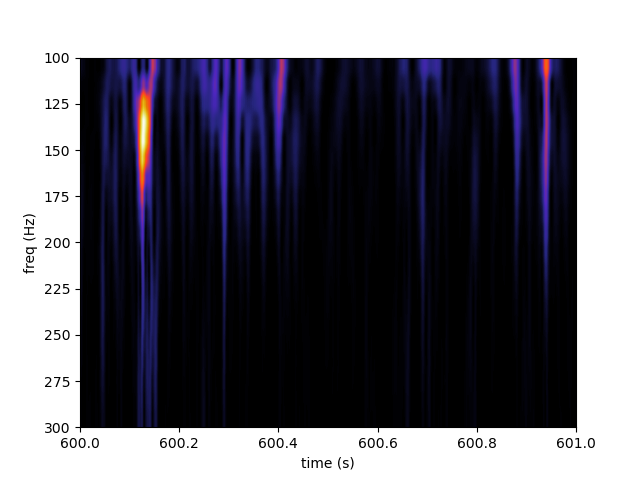

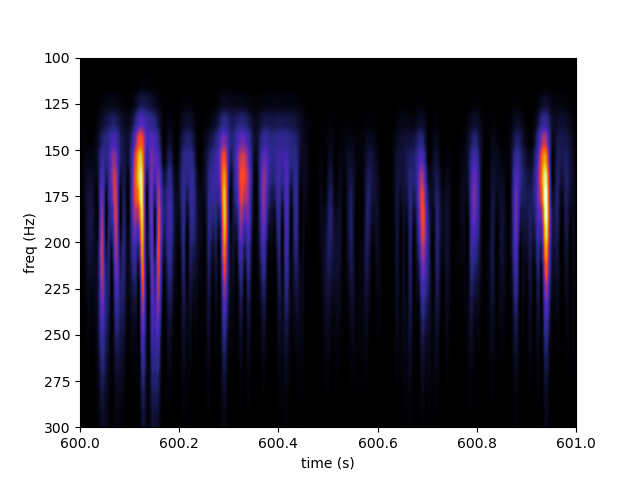

In [20]:
# 1 s of data, choosing data from mean luminance grey
fs = 1250 
start = 750000 # 8445 * 1250 # 750000
add = fs * 1
data = lfp[start:start + add,38]
dt = 1/fs
lfp_bandpass = bandpass_filter(data, 150, 250, filter_order = 5 )
wavelet = "cmor1.5-1.0"
freqs = np.linspace(100., 300., 20)/fs
scales_to_use = pywt.frequency2scale(wavelet, freqs)
# Not filtered
[cfs, frequencies] = pywt.cwt(data=data, scales=scales_to_use, wavelet=wavelet, sampling_period=dt)
power = np.abs(cfs)**2

plt.figure()
plt.imshow(power, extent=[start/1250,(start + add)/1250,freqs[-1]*fs,
                         freqs[0]*fs], aspect='auto', cmap='CMRmap')

plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.show()
# Filtered 
[cfs, frequencies] = pywt.cwt(data=lfp_bandpass, scales=scales_to_use, wavelet=wavelet, sampling_period=dt)
power_filtered = np.abs(cfs)**2
plt.figure()
plt.imshow(power_filtered, extent=[start/1250,(start + add)/1250,freqs[-1]*fs,
                         freqs[0]*fs], aspect='auto', cmap='CMRmap')
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.show()

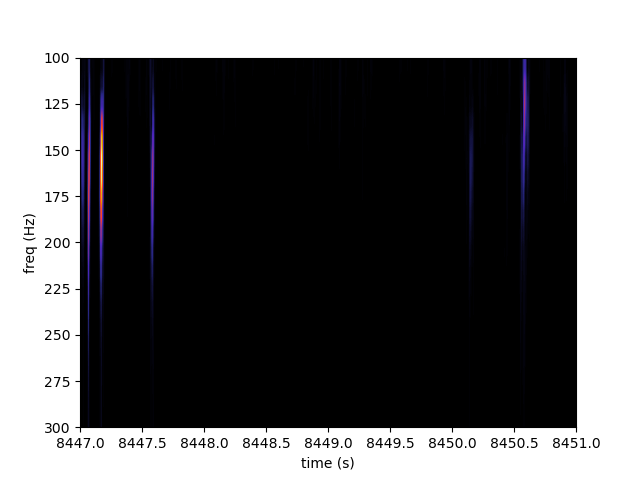

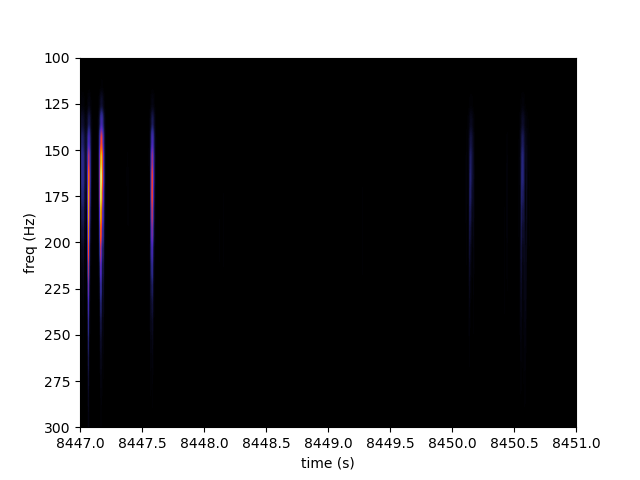

In [23]:
# 3s of data, choosing data from mean luminance grey
fs = 1250 
start = 8447 * 1250 # 8445 * 1250 # 750000
add = fs * 4
data = lfp[start:start + add,38]
dt = 1/fs
lfp_bandpass = bandpass_filter(data, 150, 250, filter_order = 5 )
wavelet = "cmor1.5-1.0"
freqs = np.linspace(100., 300., 20)/fs
scales_to_use = pywt.frequency2scale(wavelet, freqs)
# Not filtered
[cfs, frequencies] = pywt.cwt(data=data, scales=scales_to_use, wavelet=wavelet, sampling_period=dt)
power = np.abs(cfs)**2
plt.figure()
plt.imshow(power, extent=[start/1250,(start + add)/1250,freqs[-1]*fs,
                         freqs[0]*fs], aspect='auto', cmap='CMRmap')

plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.show()
# Filtered 
[cfs, frequencies] = pywt.cwt(data=lfp_bandpass, scales=scales_to_use, wavelet=wavelet, sampling_period=dt)
power_filtered = np.abs(cfs)**2
plt.figure()
plt.imshow(power_filtered, extent=[start/1250,(start + add)/1250,freqs[-1]*fs,
                         freqs[0]*fs], aspect='auto', cmap='CMRmap')
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.show()

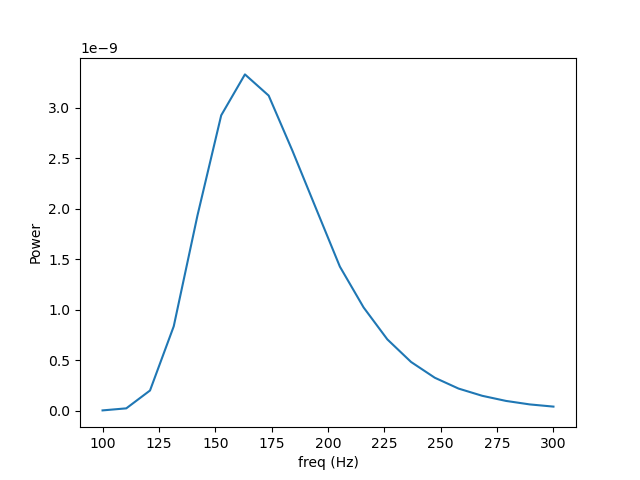

In [24]:
plt.figure()
power_avg = np.mean(np.abs(cfs)**2, axis=1)
plt.plot(frequencies,power_avg)
plt.xlabel('freq (Hz)')
plt.ylabel('Power')
plt.show()

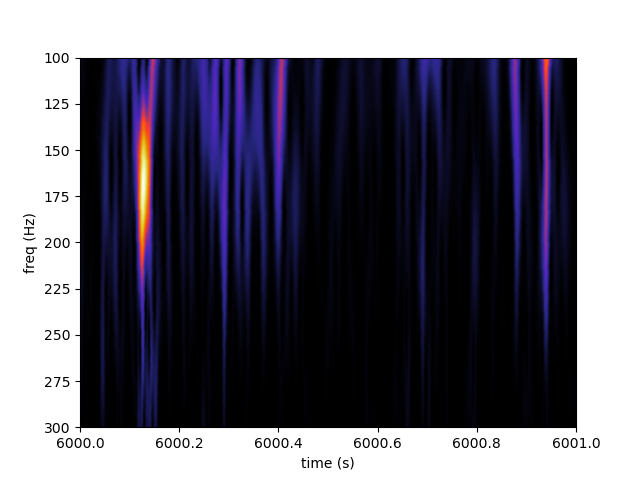

In [25]:
# FEDERICO's 
# data = lfp[6250:62500,39]
fs = 1250 
start = 750000 # 8445 * 1250 # 750000
add = fs * 1
data = lfp[start:start + add,38]


frq_limits = [100,300]

dt = 1/fs
n_freq_per_band = 80
time_interval_s = None
# 'morl' wavelet
wavelet = "cmor1.5-1.0"  # 'cmor1.5-1.0'
scales = np.arange(1, 1000, 0.1)
s2f_orig = pywt.scale2frequency(wavelet, scales) / dt

# find upper and lower scale
lower_scale = scales[np.argmin(np.abs(s2f_orig-frq_limits[0]))]
upper_scale = scales[np.argmin(np.abs(s2f_orig-frq_limits[1]))]

scales_to_use = np.linspace(np.sqrt(lower_scale), np.sqrt(upper_scale), n_freq_per_band)**2

# Wavelet decomposition
[cfs, frequencies] = pywt.cwt(data=data, scales=scales_to_use, wavelet=wavelet, sampling_period=dt)
power = np.abs(cfs)**2

# Plotting 
plt.figure()
plt.imshow(power, extent=[7500000/1250,(7500000 + add)/1250,freqs[-1]*fs,
                         freqs[0]*fs], aspect='auto', cmap='CMRmap')

plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.show()

# Ripple detection 

## Method 1

In [23]:
def get_ripple_times(lfp_envelope, large_thr, small_thr, fs =1250):
    original = np.int32(lfp_envelope > large_thr)
    original_2 = np.int32(lfp_envelope> small_thr)
    
    diff = [original[1] - original[0]]
    diff_2 = [original_2[1] - original_2[0]]
    
    time_onset = []
    time_offset = []
    time_onset_2 = []
    time_offset_2 = []
    
    for i in range(1, len(original)-1):
        diff.append(original[i+1] - original[i])
        if diff[i-1] == 1 and diff[i] == 0: time_onset.append(i)
        if diff[i-1] == 0 and diff[i] == -1 : time_offset.append(i)
    
    for i in range(1, len(original_2)-1):
        diff_2.append(original_2[i+1] - original_2[i])
        if diff_2[i-1] == 1 and diff_2[i] == 0: time_onset_2.append(i)
        if diff_2[i-1] == 0 and diff_2[i] == -1 : time_offset_2.append(i)
    
    # Finding closest values 
    # Want to finde the closest number to time_onset in time_onset_2 
    # time_onset_2 < time_onset
    # time_offset_2 > time_offset
    
    time_onset_out = []
    time_offset_out = []
    for k in time_onset:
        closest_onset = time_onset_2[0]
        for num in time_onset_2:
            if abs(num - k) < abs(closest_onset - k):
                closest_onset = num
            if num > k or num == k:
                break
        time_onset_out.append(closest_onset) 
        
    closest_offset = time_offset_2[0]
    for k in time_offset:    
        for num in time_offset_2:
            if abs(num - k) < abs(closest_offset - k):
                closest_offset = num
            if num > k or num == k:
                break
        time_offset_out.append(closest_offset)
    
    
    # Edge cases 
    if len(time_offset_out) > len(time_onset_out):
        time_onset_out = [0] + time_onset_out  # if session starts with a ripple
    if len(time_offset_out) < len(time_onset_out):
        time_offset_out.append(len(original))  # if session ends with a ripple'''
    
    times = np.column_stack((time_onset_out, time_offset_out))
    # Cleaning 
    # Cross for at least 6 ms 
    # Min duration of 50 ms 
    # Max duration ? 
    return times


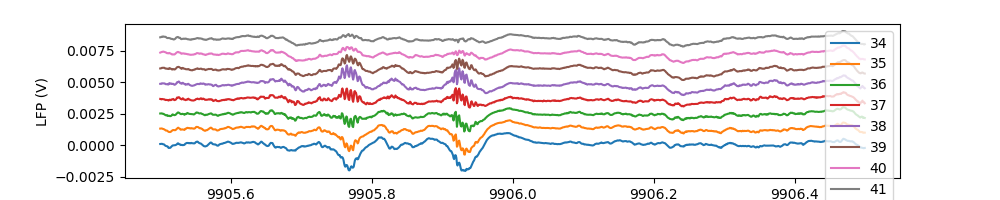

In [21]:
# With ripple
lfp_slice = lfp.sel(time=slice(9905.5,9906.5)) 
#indices = np.array([41, 40, 39, 38, 37, 36, 35, 31])
indices = np.array([34, 35, 36, 37, 38, 39, 40, 41])
plt.figure(figsize=(10,2))
j = 0
for i in indices:
    _ = plt.plot(lfp_slice.time, lfp_slice.sel(channel=lfp_slice.channel[i]) + j, label = '{}'.format(i))
    j += 0.0012
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')
plt.legend()
plt.show()

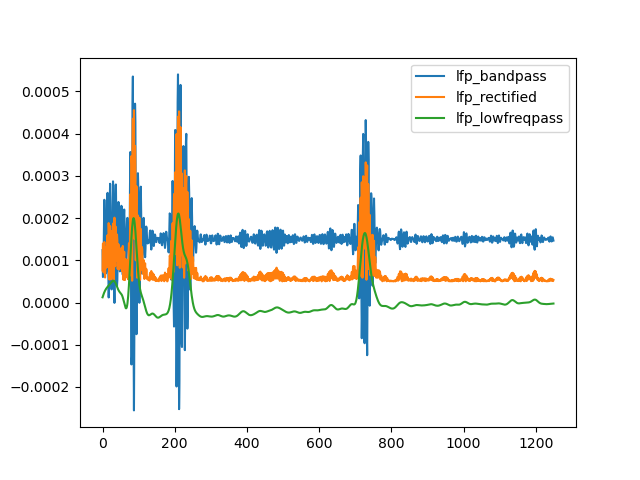

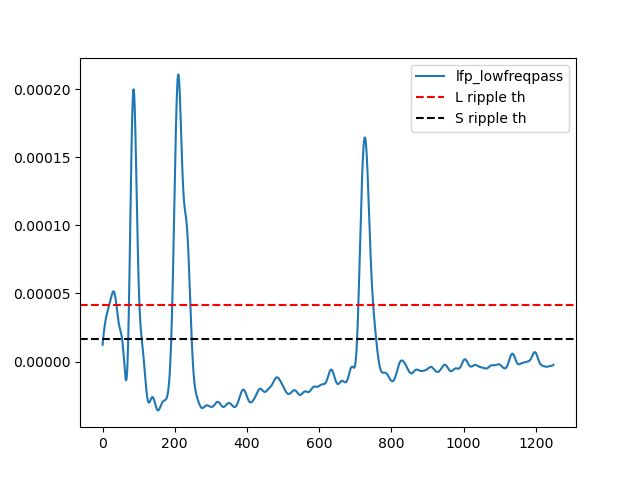

In [22]:
##### BAND-PASS FILTERING 
plt.figure()
fs = 1250
# start = 9905*1250 + np.int64(1250/2)
start = 8447 * fs  
end = start + fs 

#plt.plot(lfp[start:end,38]+0.00039, label='raw_lfp')

signal = lfp[:,38] - np.mean(lfp[:,38]) # get rid of 0 frequency component --> same as raw lfp 
#plt.plot(signal[start:end]+0.00039, label='lfp_no_0')

lfp_bandpass = bandpass_filter(signal, 150, 250, filter_order = 5 )
plt.plot(lfp_bandpass[start:end]+0.00015, label='lfp_bandpass')

# ABSOLUTE VALUE, RECTIFIED 
lfp_abs = np.abs(lfp_bandpass) # needed? after filter everything is bigger than 0
plt.plot(lfp_abs[start:end]+0.00005, label='lfp_rectified') # +0.00005

# LOW-PASS, ENVELOPE
lfp_envelope = bandpass_filter(lfp_abs, 1,50, filter_order = 5 )
plt.plot(lfp_envelope[start:end], label='lfp_lowfreqpass')
plt.legend()
plt.show() 

# DOUBLE THRESHOLDING 
std = np.std(lfp_abs)
large_thr = 2.5 * std
small_thr = 1 * std

plt.figure()
plt.plot(lfp_envelope[start:end], label='lfp_lowfreqpass')
# plt.plot(lfp_bandpass_2[8444*1250 : 8444 * 1250 + 60 * 20 * 1250], label='lfp_lowfreqpass')
plt.axhline(y=large_thr,linestyle='--',c='r',label='L ripple th')
plt.axhline(y=small_thr,linestyle='--',c='k',label='S ripple th')

plt.legend()
plt.show()


In [49]:
times_M1 = get_ripple_times(lfp_envelope, large_thr, small_thr, fs =1250)

In [50]:
np.shape(times_M1)

(2884, 2)

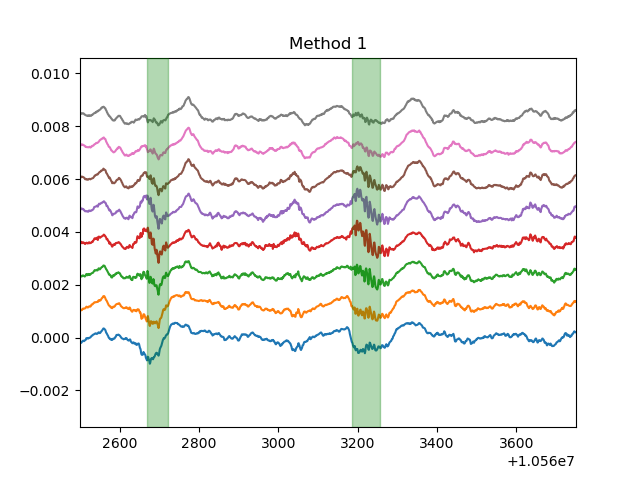

In [79]:
start = 8450 * fs
end = start + fs
indices = np.array([34, 35, 36, 37, 38, 39, 40, 41])
fig, ax = plt.subplots()
j = 0
for i in indices: 
    ax.plot(lfp[:,i]+j, label = '{}'.format(i))
    j += 0.0012
for i in range(len(times_M1)): ax.axvspan(times_M1[i][0], times_M1[i][1], alpha=0.3, color="green", zorder=1000)
ax.set(xlim=(start, end))
# ax.legend()
ax.set_title('Method 1')
plt.show()

### <div>
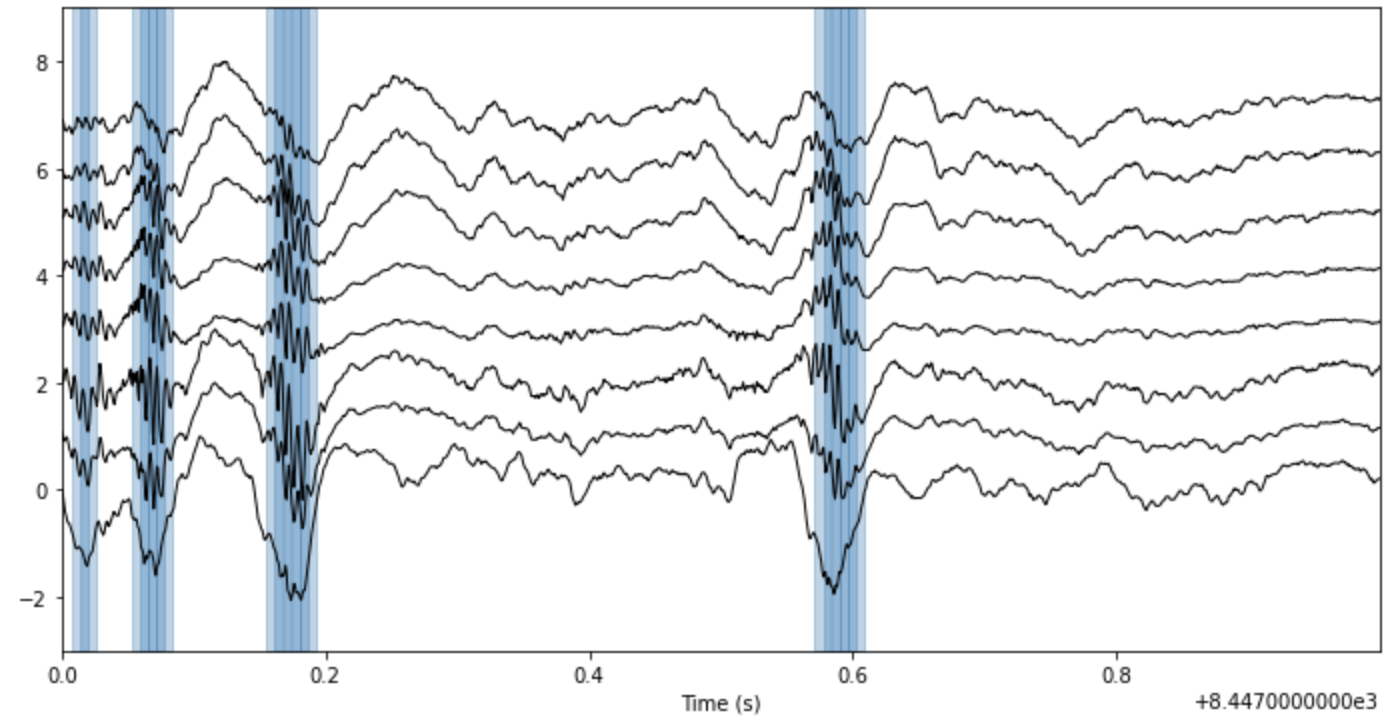
</div>



## Method 2

In [ ]:
def power(data, 

In [87]:
# 1 s of data, choosing data from mean luminance grey
fs = 1250 
data = lfp[:,38]
dt = 1/fs
lfp_bandpass = bandpass_filter(data, 150, 250, filter_order = 5 )
wavelet = "cmor1.5-1.0"
freqs = np.linspace(100., 300., 20)/fs
scales_to_use = pywt.frequency2scale(wavelet, freqs)
# Filtered
[cfs, frequencies] = pywt.cwt(data=lfp_bandpass, scales=scales_to_use, wavelet=wavelet, sampling_period=dt)
#plt.figure()
#plt.imshow(power, extent=[start/1250,(end)/1250,freqs[-1]*fs,freqs[0]*fs], aspect='auto', cmap='CMRmap')

#plt.xlabel('time (s)')
#plt.ylabel('freq (Hz)')
#plt.show()

In [88]:
np.std(zscored_power)

0.9999999999999993

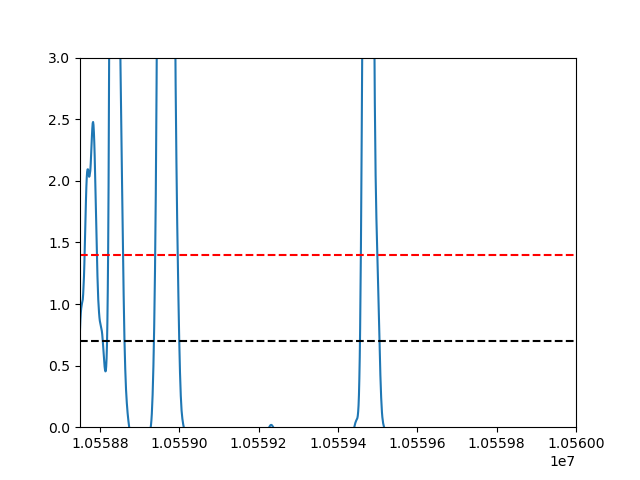

In [89]:
start = 8447 * fs 
end = start + fs 
power_avg = np.mean(np.abs(cfs)**2, axis=0)

large_thr = 1.4 * np.std(zscored_power)
small_thr = 0.7 * np.std(zscored_power)

zscored_power = zscore(power_avg)

plt.figure()
plt.plot(zscored_power)
plt.axhline(y=large_thr,linestyle='--',c='r',label='L ripple th')
plt.axhline(y=small_thr,linestyle='--',c='k',label='S ripple th')
plt.xlim([start, end])
plt.ylim([0, 3])
plt.show()

In [90]:
times_M2 = get_ripple_times(zscored_power, large_thr, small_thr, fs=1250)


In [91]:
np.shape(times_M2)

(2257, 2)

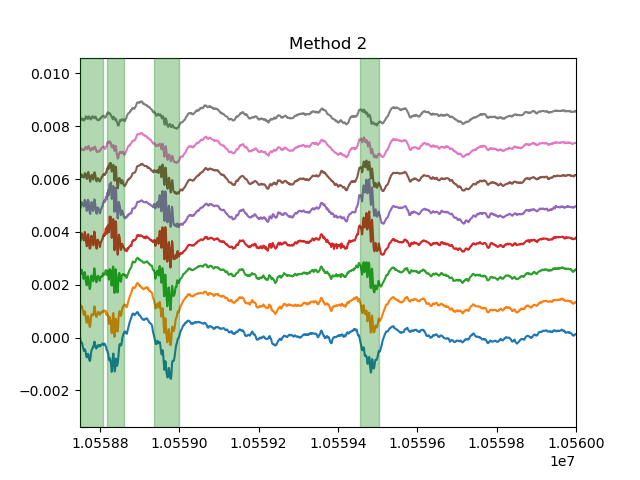

In [94]:
indices = np.array([34, 35, 36, 37, 38, 39, 40, 41])
fig, ax = plt.subplots()
j = 0
for i in indices: 
    ax.plot(lfp[:,i]+j, label = '{}'.format(i))
    j += 0.0012
for i in range(len(times_M2)): ax.axvspan(times_M2[i][0], times_M2[i][1], alpha=0.3, color="green", zorder=1000)
ax.set(xlim=(start, end))
# ax.legend()
ax.set_title('Method 2')
plt.show()

# Filtering

In [181]:
fs = 1250 
start = 750000 # 8445 * 1250 # 750000
add = 400
data = lfp[start:start + add,38]

In [182]:
lfp_bandpass = bandpass_filter(data, 150, 250, filter_order = 5 )
lfp_bandpass_2 = bandpass_filter(data, 150, 250, filter_order = 10 )
lfp_bandpass_3 = bandpass_filter(data, 150, 250, filter_order = 15 )

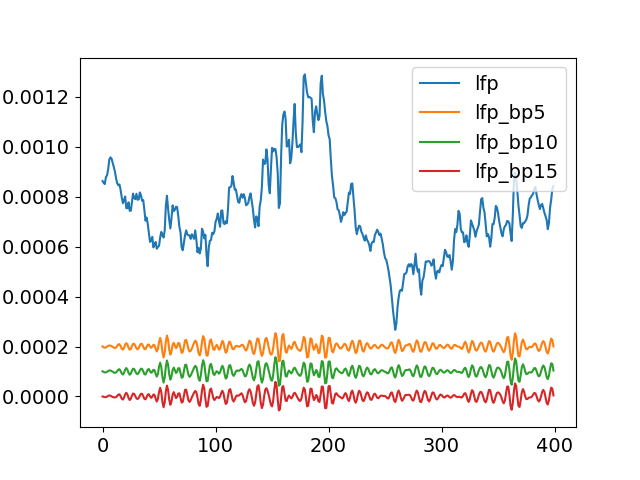

In [183]:
plt.figure()
plt.plot(data + 0.0007, label='lfp')
plt.plot(lfp_bandpass+ 0.0002,'-' ,label='lfp_bp5')
plt.plot(lfp_bandpass_2 + 0.0001,'-' ,label='lfp_bp10')
plt.plot(lfp_bandpass_3,'-' ,label='lfp_bp15')

plt.legend()
plt.show()

In [178]:
fs = 1250 
start = 750000 # 8445 * 1250 # 750000
add = fs * 10
data = lfp[start:start + add,38]

In [179]:
delta_lfp_bandpass = bandpass_filter(data, 1, 4, filter_order = 5 )
delta_lfp_bandpass_2 = bandpass_filter(data, 1, 4, filter_order = 6 )
delta_lfp_bandpass_3 = bandpass_filter(data, 1, 4, filter_order = 4 )

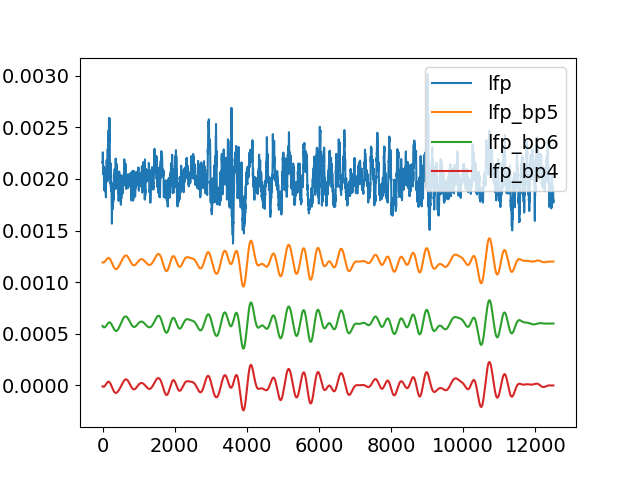

In [180]:
plt.figure()
plt.plot(data + 0.002, label='lfp')
plt.plot(delta_lfp_bandpass + 0.0012  ,'-' ,label='lfp_bp5')
plt.plot(delta_lfp_bandpass_2 + 0.0006,'-' ,label='lfp_bp6')
plt.plot(delta_lfp_bandpass_3,'-' ,label='lfp_bp4')
plt.legend()
plt.show()

# Computing CSD

In [153]:
# Spatial Laplacian of the LFP
import scipy.ndimage
lfp.shape

(12419461, 75)

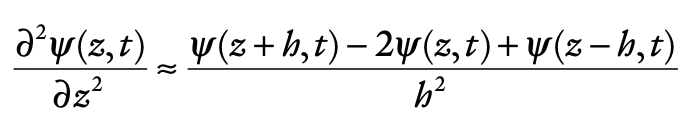

In [154]:
h = 4e-6 # vertical spacing
fs = 1250
start = 8445 * fs #ripple in 8445, detected by cnn-ripple
end = start + fs * 1 # seconds interested in 
csd = []

for i in range(1,lfp.shape[1]-1):
    csd.append((lfp[start:end,i+1] - 2*lfp[start:end,i] + lfp[start:end,i-1]) / h**2)
csd = np.array(list(csd))
filtered_csd = gaussian_filter(csd, sigma=(5,1))

In [155]:
np.shape(csd)


(73, 1250)

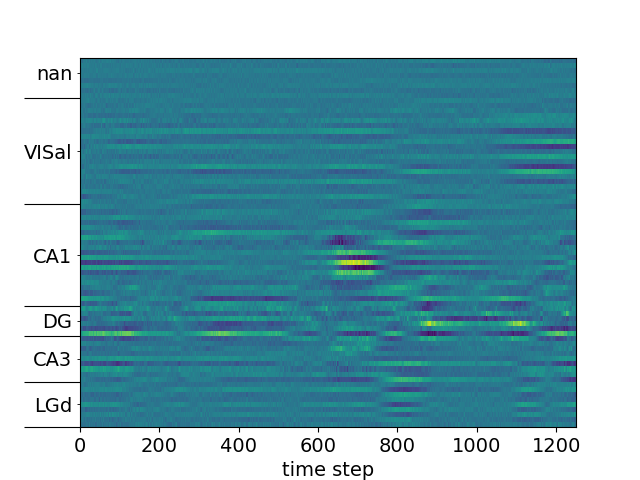

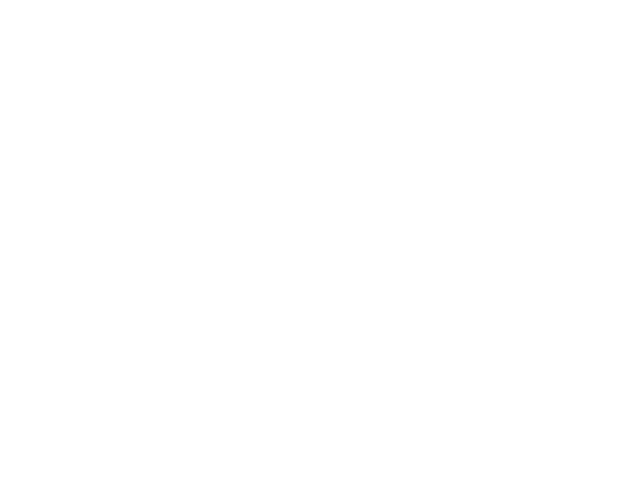

In [156]:
# Not filtered
plt.figure()
fig, ax = plt.subplots()
ax.set_yticks(intervals)
ax.set_yticks(interval_midpoints, minor=True)
ax.set_yticklabels(structure_acronyms, minor=True)
plt.tick_params("y", which="major", labelleft=False, length=40)
ax.set_xlabel("time step")
ax.pcolormesh(csd)
plt.show()

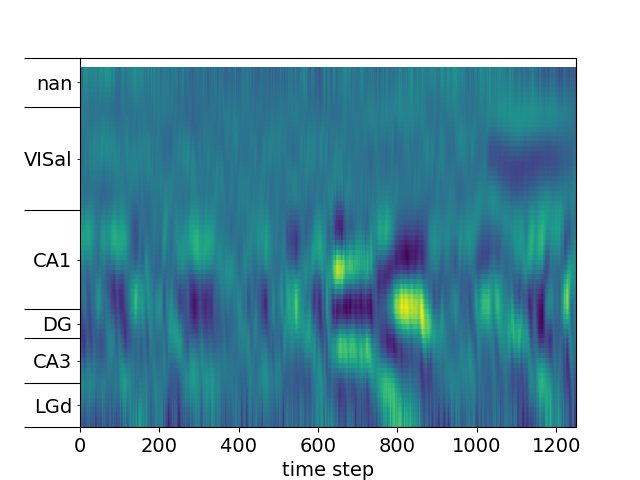

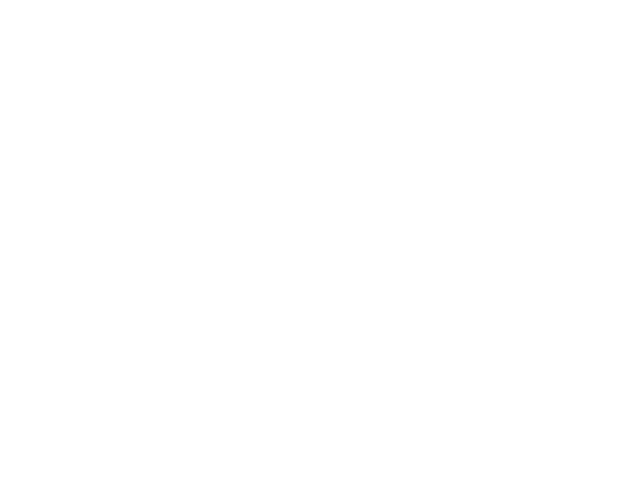

In [157]:
# Filtered
plt.figure()
fig, ax = plt.subplots()
ax.pcolormesh(filtered_csd)
ax.set_yticks(intervals)
ax.set_yticks(interval_midpoints, minor=True)
ax.set_yticklabels(structure_acronyms, minor=True)
plt.tick_params("y", which="major", labelleft=False, length=40)
ax.set_xlabel("time step")

plt.show()

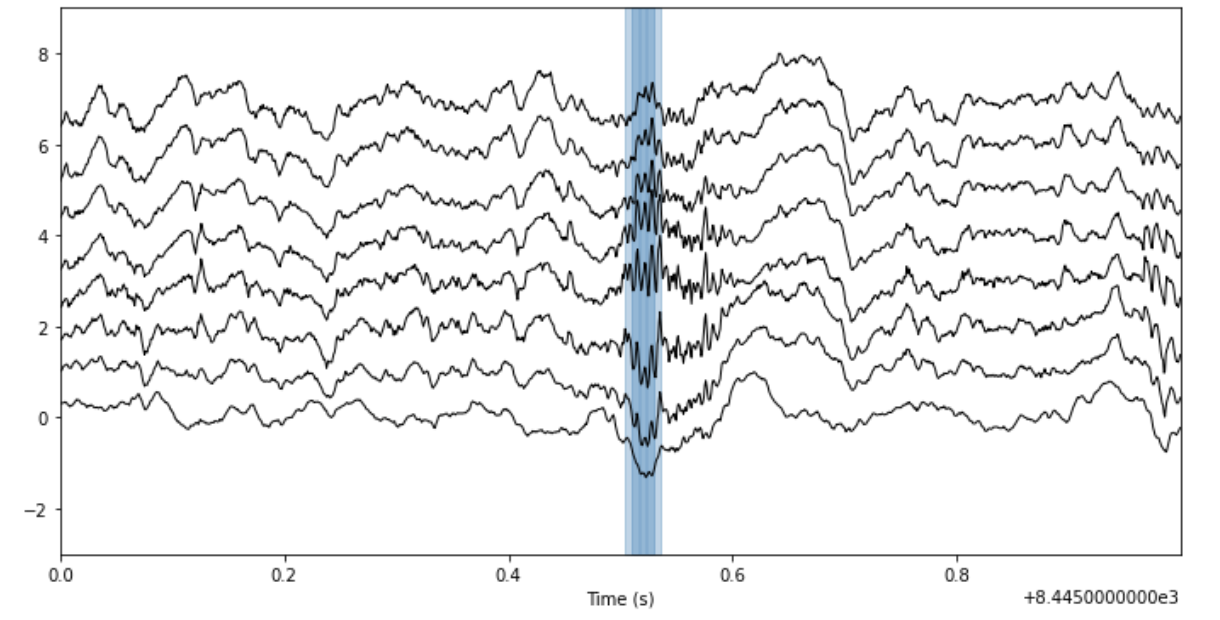